In [2]:
from log_nume_ex import Short_FISTA
from log_nume_ex import lattice
from log_nume_ex import kakunou
from log_nume_ex import qseplot
import time
import numpy as np
import pandas as pd
import scipy.optimize as optimize
import scipy.sparse as spsp
import matplotlib.pyplot as plt
import csv
import os

from scipy.spatial import distance
from scipy.optimize import linprog
from scipy.optimize import minimize
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import ScalarFormatter
from matplotlib.font_manager import FontProperties

## 真値計算

In [2]:
Col = 20
for Col in Col_list:
    for E in E_list:
        print("="*40)
        print(f"K={Col}^2, E={E}")
        
        K = Col * Col
    
        M = 0.1 * K
        N = 0.1 * K

        # dF_long = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
        #     fr'shortlong/kaisekikai/theta=5.0/mesh/E={E}/v_proj=0.1/K={Col}^2/truevalue/jikken_F.xlsx')
        # dH_long = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
        #     fr'shortlong/kaisekikai/theta=5.0/mesh/E={E}/v_proj=0.1/K={Col}^2/truevalue/jikken_H.xlsx')

        m_fixed = np.array(dF_long['m'].tolist())
        n_fixed = np.array(dH_long['n'].tolist()).reshape(K, K)

        m_per = M / K
        m_fixed = np.array([m_per] * K)
        n_fixed = np.full((K, K), N / (K * K))

        # Scaling * tが格子の最小距離となる。
        Scaling = 10 / Col

        city_network = lattice.make_lattice(Col)

        # 通勤費用パラメータ
        t = 0.1

        # 距離抵抗パラメータ
        tau = 0.5

        # 総土地供給量
        S_total = 100
        S_bar = S_total / K

        Coordinate_Data = \
        np.array([(city_network['node_dic'][str(i)]['x_pos']*Scaling,
                   city_network['node_dic'][str(i)]['y_pos']*Scaling) for i in range(K)])
        distance_matrix = distance.squareform(distance.pdist(Coordinate_Data))

        theta_N = 1.0
        theta_M = 1.0

        alpha_1 = 0.4
        alpha_2 = 0.4
        beta_1 = 0.4
        beta_2 = 0.4

        L = 0.2
        eta = 1.5
        p_proj = 1e-3

        RW_ini = 1.0
        
        method = "FISTA"
        
        dic = "mesh"

        #パラメータ設定
        prm = Short_FISTA.Parameter(Col, distance_matrix, t, tau, Scaling, S_total, S_bar,
                    theta_M, theta_N, E, alpha_1, alpha_2, beta_1, beta_2, M, N)
        algprm = Short_FISTA.Algo_Parameter(L, eta, p_proj)
        short = Short_FISTA.Short(prm, algprm, m_fixed, n_fixed)
        long = Long.Long(prm, algprm, short)

        #step.1-1
        R_true, W_true, iteration, err_R, err_W, err_v, err_pi, err_obj, grad_mean =\
        short.short_solve(RW_ini, R_corr=None, W_corr=None, pi_corr=None, v_corr=None, obj_corr=None,
                          short_itr=10001, err_short=10**(-8), rel=0)

        pi_true = short.pi(R_true, W_true)
        v_true = short.v(R_true, W_true)
        
        kakunou.kakunou_true(R_true, W_true, pi_true, v_true, prm, algprm, method, dic)

K=5^2, E=2
short_max_value: 108
Lyapunov: 7.541946732501389e-09
K=5^2, E=5
short_max_value: 145
Lyapunov: -4.7291417848479806e-08
K=5^2, E=8
short_max_value: 75
Lyapunov: -1.4711402250771801e-09
K=5^2, E=10
short_max_value: 335
Lyapunov: 6.08995770429954e-09
K=8^2, E=2
short_max_value: 108
Lyapunov: 4.392415007826387e-08
K=8^2, E=5
short_max_value: 156
Lyapunov: -8.276587521703219e-07
K=8^2, E=8
short_max_value: 80
Lyapunov: 9.988723225297333e-09
K=8^2, E=10
short_max_value: 950
Lyapunov: -3.079453205990768e-06
K=10^2, E=2
short_max_value: 108
Lyapunov: 4.6814198300109684e-08
K=10^2, E=5
short_max_value: 191
Lyapunov: 8.64685362674353e-08
K=10^2, E=8
short_max_value: 88
Lyapunov: 2.072235587855476e-08
K=10^2, E=10
short_max_value: 982
Lyapunov: 3.6417147070831984e-06


## 真値計算 + グラフ描画

short_max_value: 293
Lyapunov: -3.21972324516468e-06
short_max_value: 568
Lyapunov: 5.444893486485084e-06
short_max_value: 68
Lyapunov: -8.503664663920502e-08


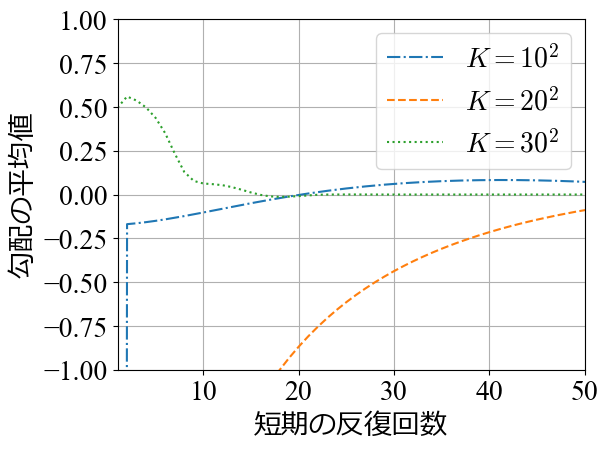

short_max_value: 132
Lyapunov: 2.9582594693031866e-08
short_max_value: 45
Lyapunov: 1.2831624776000453e-09
short_max_value: 570
Lyapunov: 2.0686019934595287e-05


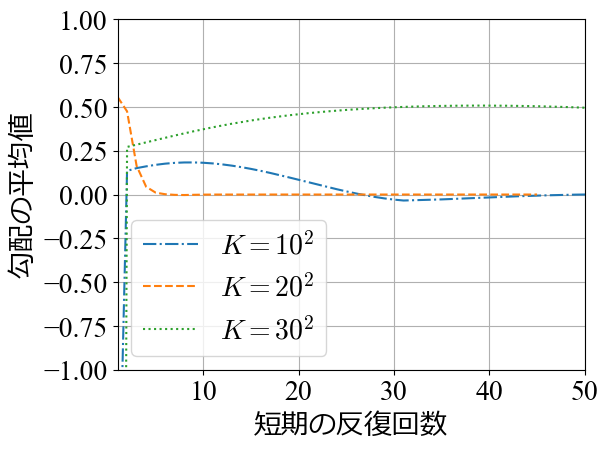

In [17]:
E_list = [8, 10]
Col_list = [10, 20, 30]
itr_list = []
grad_list = []
for E in E_list:
    
    for Col in Col_list:
        
        print("="*40)
    
        K = Col * Col

        M = 0.1 * K
        N = 0.1 * K

        dF_long = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
        fr'shortlong/FISTA/theta=5.0/E=10/mesh/K={Col}^2/truevalue/jikken_F.xlsx')
        dH_long = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
        fr'shortlong/FISTA/theta=5.0/E=10/mesh/K={Col}^2/truevalue/jikken_H.xlsx')

        m_fixed = np.array(dF_long['m'].tolist())
        n_fixed = np.array(dH_long['n'].tolist()).reshape(K, K)

        # m_per = M / K
        # m_fixed = np.array([m_per] * K)
        # n_fixed = np.full((K, K), N / (K * K))

        # Scaling * tが格子の最小距離となる。
        Scaling = 0.15

        city_network = lattice.make_lattice(Col)

        # 通勤費用パラメータ
        t = 0.1

        # 距離抵抗パラメータ
        tau = 0.01

        # 総土地供給量
        S_total = K
        S_bar = S_total / K

        Coordinate_Data = \
        np.array([(city_network['node_dic'][str(i)]['x_pos']*Scaling,
                   city_network['node_dic'][str(i)]['y_pos']*Scaling) for i in range(K)])
        distance_matrix = distance.squareform(distance.pdist(Coordinate_Data))

        theta_N = 5.0
        theta_M = 5.0

        # E = 5

        alpha_1 = 0.4
        alpha_2 = 0.4
        beta_1 = 0.4
        beta_2 = 0.4
        
        L = 0.2
        eta = 1.2
        p_proj = 0.1
        
        RW_ini = 1.0
    
        #パラメータ設定
        prm = Short_Algo.Parameter(Col, distance_matrix, t, tau, Scaling, S_total, S_bar,
                    theta_M, theta_N, E, alpha_1, alpha_2, beta_1, beta_2, M, N)
        algprm = Short_Algo.Algo_Parameter(L, eta, p_proj)
        short = Short_Algo.Short(prm, algprm, m_fixed, n_fixed)
    
        #step.1-1
        R_true, W_true, iteration, err_R, err_W, err_v, err_pi, err_obj, grad_mean =\
        short.short_solve(RW_ini, R_corr=None, W_corr=None, pi_corr=None, v_corr=None, obj_corr=None,
                          short_itr=10001, err_short=10**(-8), rel=0)

        pi_true = short.pi(R_true, W_true)
        v_true = short.v(R_true, W_true)
        
        itr_list.append(iteration)
        grad_list.append(grad_mean)

        #step.1-2
#         true_path_f, true_path_h = kakunou.kakunou_true(R_true, W_true, pi_true, v_true, prm, algprm)
        
#         print("true_path_f:", true_path_f)
#         print("true_path_h:", true_path_h)
    
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Times New Roman'
    plt.rcParams['mathtext.fontset'] = 'cm'  # 数式フォントもTimes New Romanに設定

    font_path = r'C:\Windows\Fonts\meiryo.ttc'  # フォントのパスを指定
    jp_font = FontProperties(fname=font_path)
    
    plt.plot(itr_list[0], grad_list[0], '-.', label = f'$K = {Col_list[0]}^2$')
    plt.plot(itr_list[1], grad_list[1], '--', label = f'$K = {Col_list[1]}^2$')
    plt.plot(itr_list[2], grad_list[2], ':', label = f'$K = {Col_list[2]}^2$')
    # plt.yscale('log')

    plt.legend(fontsize=20)
    
    plt.xlabel('短期の反復回数', fontproperties=jp_font, fontsize=20)
    plt.ylabel('勾配の平均値', fontproperties=jp_font, fontsize=20)

    # plt.yticks([1e-1, 1e-2, 1e-3])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.xlim(left=1, right=50)
    plt.ylim(top=1, bottom=-1)

    plt.grid(True)

    plt.subplots_adjust(left=0.17, bottom=0.15)

    plt.show()
    
    itr_list.clear()
    grad_list.clear()

## 相対誤差計算 + グラフ描画

In [ ]:
E_list = [1, 2, 5, 8, 10]
Col_list = [10, 20, 30]
rel_path_list = []
for E in E_list:
    
    for Col in Col_list:
        
        print("="*40)
        print(f'K={Col}^2, E={E}')
        
        K = Col * Col
    
        M = 0.1 * K
        N = 0.1 * K

        # Scaling * tが格子の最小距離となる。
        Scaling = 3 / Col

        city_network = lattice.make_lattice(Col)

        # 通勤費用パラメータ
        t = 0.1

        # 距離抵抗パラメータ
        tau = 0.01

        # 総土地供給量
        S_total = K
        S_bar = S_total / K

        Coordinate_Data = \
        np.array([(city_network['node_dic'][str(i)]['x_pos']*Scaling,
                   city_network['node_dic'][str(i)]['y_pos']*Scaling) for i in range(K)])
        distance_matrix = distance.squareform(distance.pdist(Coordinate_Data))

        theta_N = 5.0
        theta_M = 5.0

        # E = 5

        alpha_1 = 0.4
        alpha_2 = 0.4
        beta_1 = 0.4
        beta_2 = 0.4
        
        L = 0.2
        eta = 1.2
        p_proj = 0.1
    
        #パラメータ設定
        prm = Short_Algo.Parameter(Col, distance_matrix, t, tau, Scaling, S_total, S_bar,
                    theta_M, theta_N, E, alpha_1, alpha_2, beta_1, beta_2, M, N)
        algprm = Short_Algo.Algo_Parameter(L, eta, p_proj)

        #長期の変数の設定
        dF_long = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
        fr'shortlong/FISTA/theta=5.0/E=10/mesh/K={Col}^2/truevalue/jikken_F.xlsx')
        dH_long = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
        fr'shortlong/FISTA/theta=5.0/E=10/mesh/K={Col}^2/truevalue/jikken_H.xlsx')

        m_fixed = np.array(dF_long['m'].tolist())
        n_fixed = np.array(dH_long['n'].tolist()).reshape(K, K)

        # m_per = M / K
        # m_fixed = np.array([m_per] * K)
        # n_fixed = np.full((K, K), N / (K * K))
        
        short = Short_Algo.Short(prm, algprm, m_fixed, n_fixed)
        
        dF_FISTA = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
            fr'short/FISTA/long_shuseki/mesh/E={prm.E}/L={algprm.L}/p_proj={algprm.p_proj}/v_proj=0.1/df=None/K={prm.Col}^2/truevalue/jikken_F.xlsx')
        dH_FISTA = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
            fr'short/FISTA/long_shuseki/mesh/E={prm.E}/L={algprm.L}/p_proj={algprm.p_proj}/v_proj=0.1/df=None/K={prm.Col}^2/truevalue/jikken_H.xlsx')
        
        R_true = np.array(dF_FISTA['R'].tolist())
        W_true = np.array(dF_FISTA['W'].tolist())
        pi_true = np.array(dF_FISTA['pi'].tolist())
        v_true = np.array(dH_FISTA['v'].tolist()).reshape(K, K)
        
        RW_true = np.concatenate((R_true, W_true))
        obj_true = short.Z_SD(RW_true)
        
        RW_ini = 1.0

        #step.1-3
        R, W, iteration, err_R, err_W, err_v, err_pi, err_obj =\
        short.short_solve(RW_ini, R_true, W_true, pi_true, v_true, obj_true, 
                          short_itr=3001, err_short=10**(-8), rel=1)

        #step.1-4
        rel_path = kakunou.kakunou_rel\
        (iteration, err_R, err_W, err_v, err_pi, err_obj, prm, algprm)

        rel_path_list.append(rel_path)

    #step.2
    print("len(rel_path_list):", len(rel_path_list))
    qseplot.rel_plot(rel_path_list, Col_list, prm, algprm)
    
    rel_path_list.clear()

## 真値計算 + 相対誤差計算 + グラフ描画

E=5, K=5^2
short_max_value: 261
Lyapunov: 2.1410505846179195e-06
short_max_value: 261
Lyapunov: 2.1410505846179195e-06
len(Z_list): 261
E=5, K=8^2
short_max_value: 261
Lyapunov: 5.481089496621876e-06
short_max_value: 261
Lyapunov: 5.481089496621876e-06
len(Z_list): 261
E=5, K=10^2
short_max_value: 261
Lyapunov: 8.564202310049943e-06
short_max_value: 261
Lyapunov: 8.564202310049943e-06
len(Z_list): 261
len(rel_path_list): 3


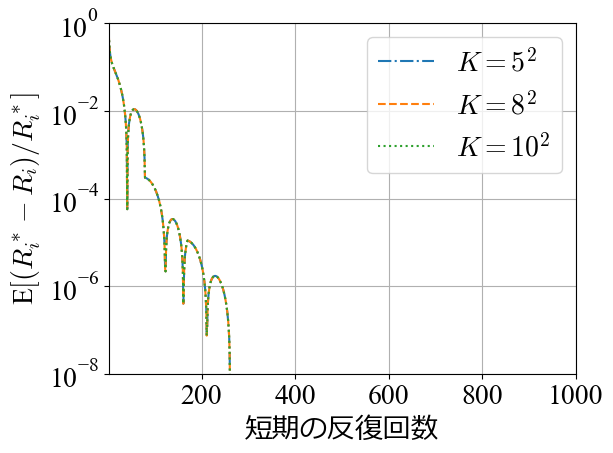

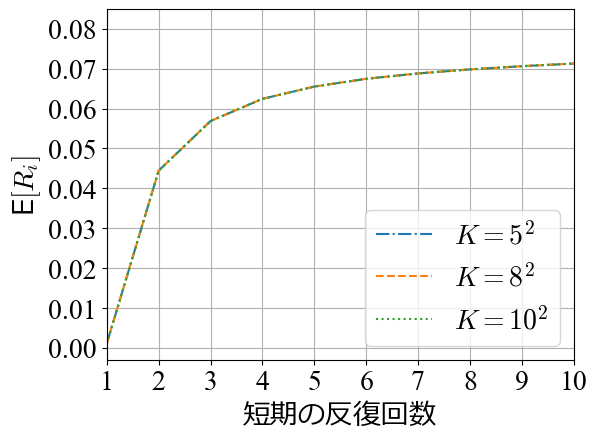

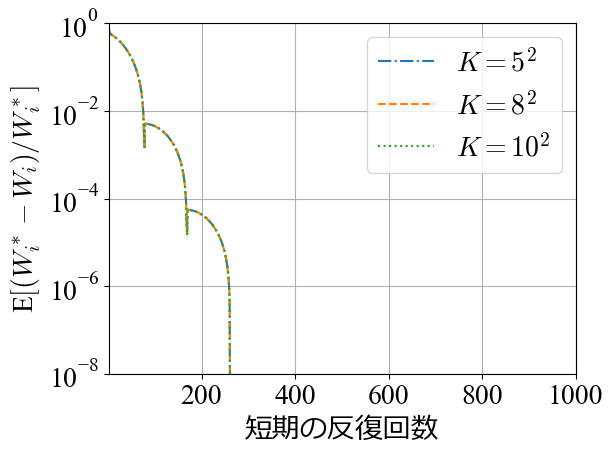

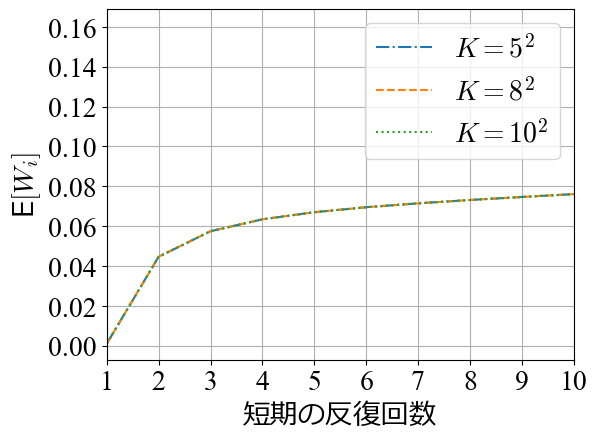

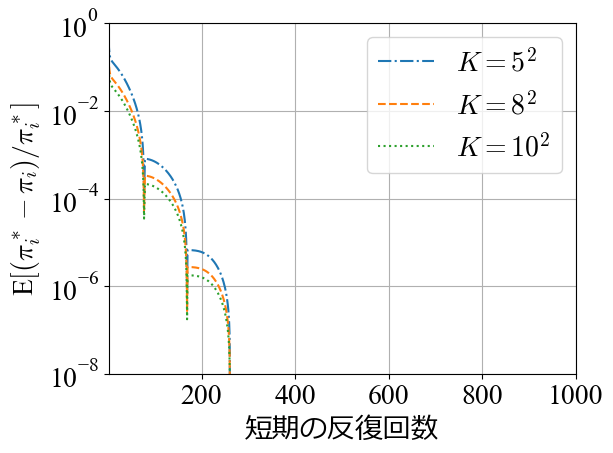

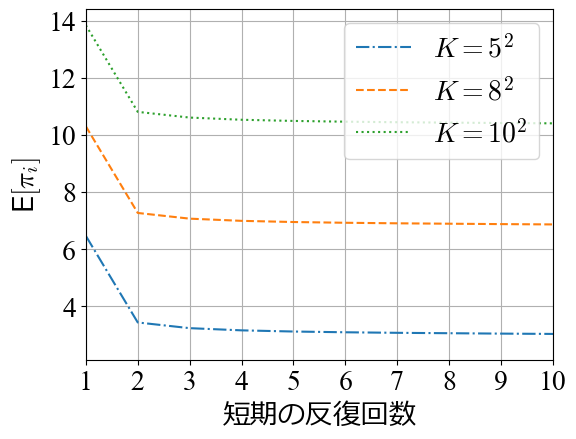

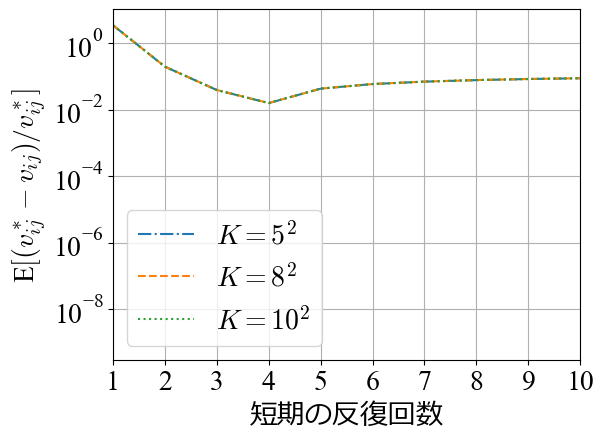

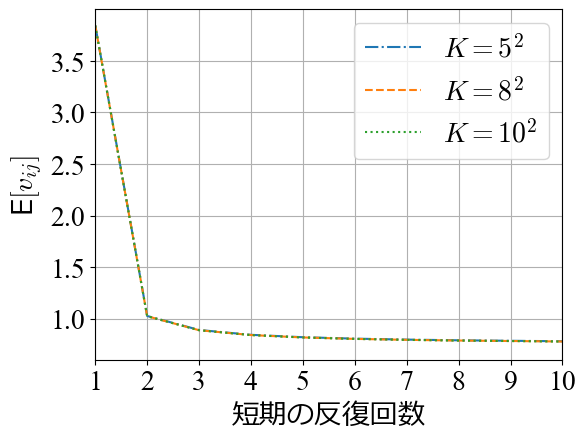

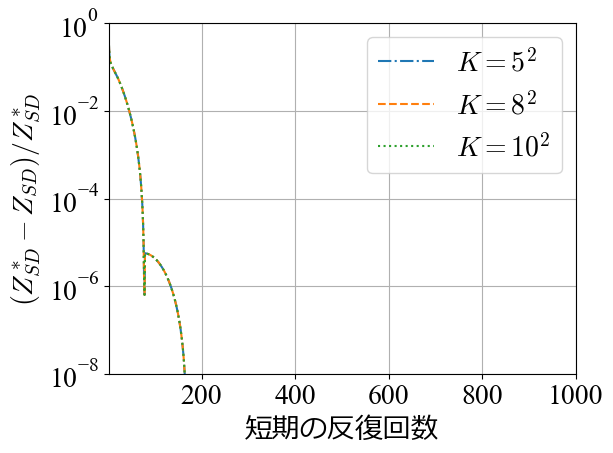

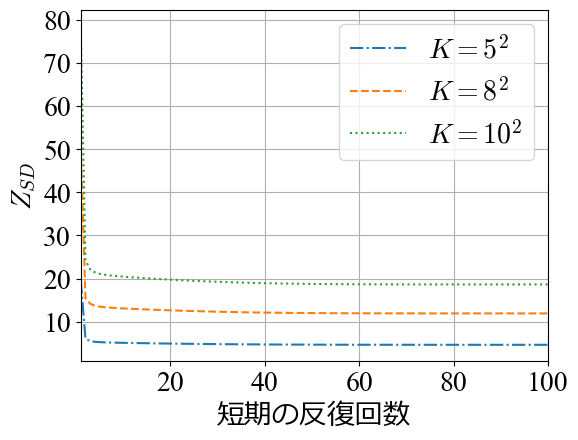

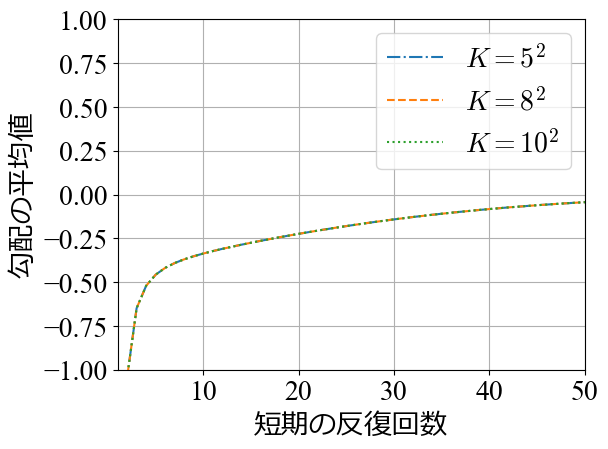

E=8, K=5^2
short_max_value: 254
Lyapunov: 8.138356193417603e-07
short_max_value: 254
Lyapunov: 8.138356193417603e-07
len(Z_list): 254
E=8, K=8^2
short_max_value: 254
Lyapunov: 2.0834191931887696e-06
short_max_value: 254
Lyapunov: 2.0834191931887696e-06
len(Z_list): 254
E=8, K=10^2
short_max_value: 254
Lyapunov: 3.255342479032376e-06
short_max_value: 254
Lyapunov: 3.255342479032376e-06
len(Z_list): 254
len(rel_path_list): 3


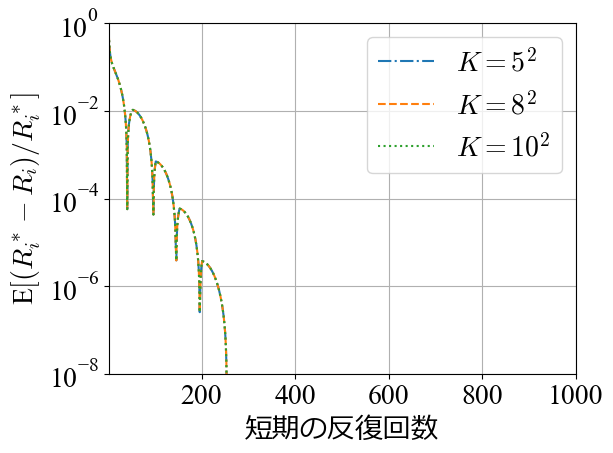

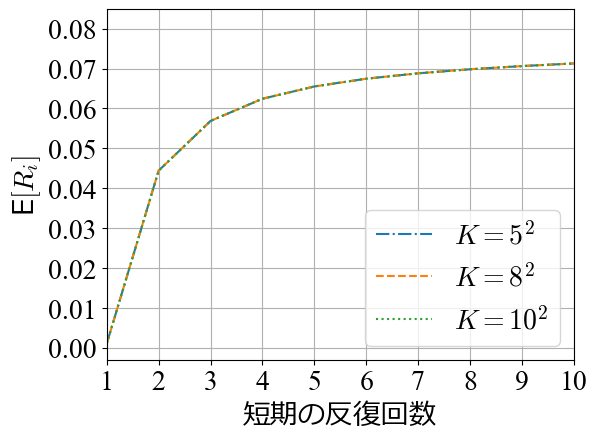

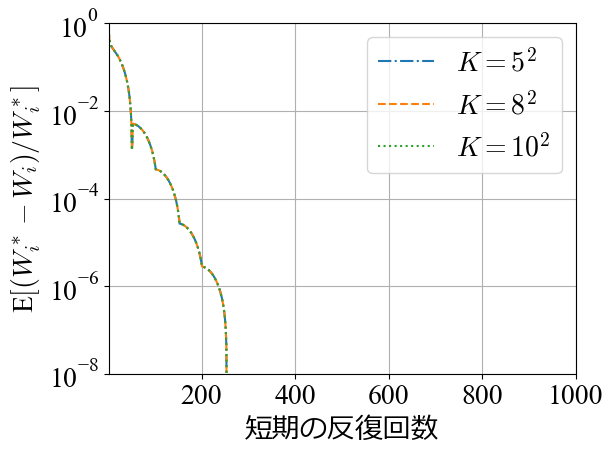

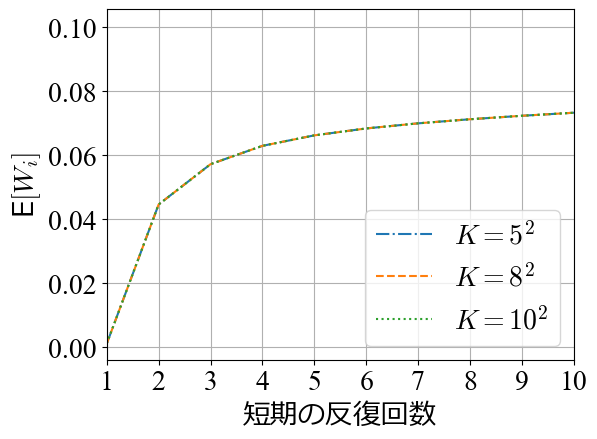

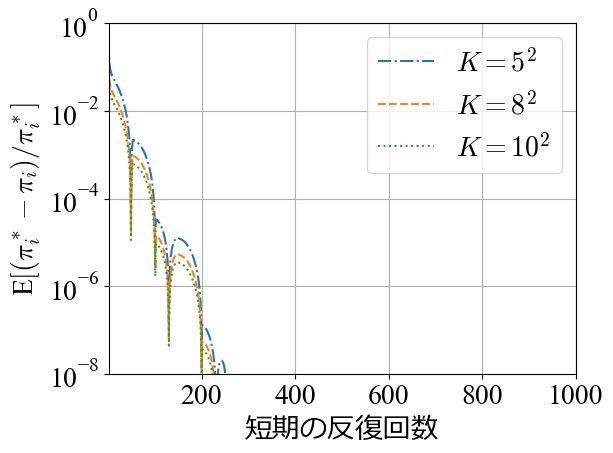

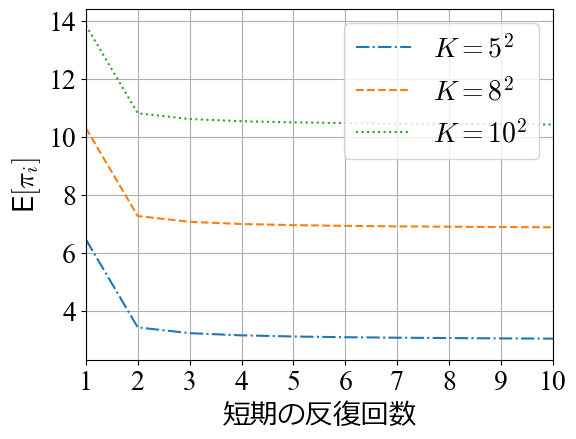

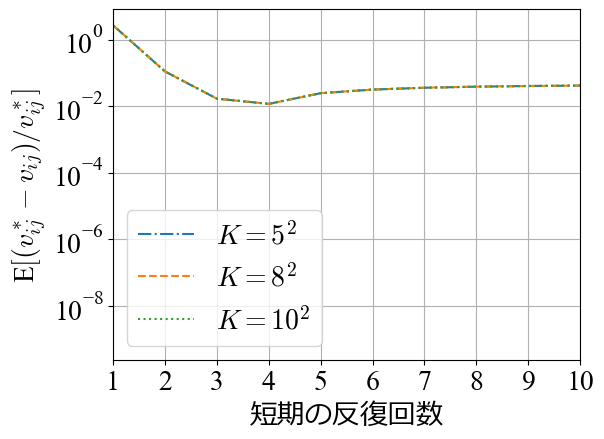

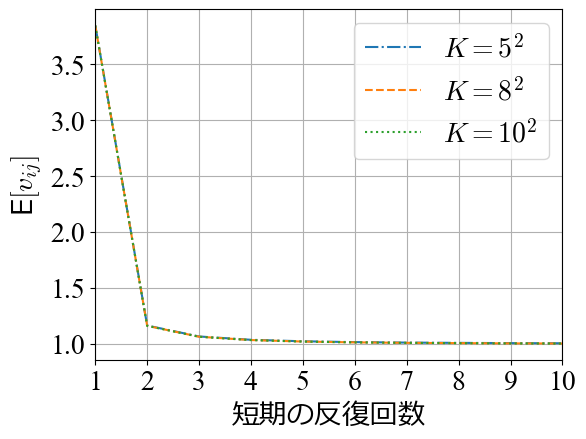

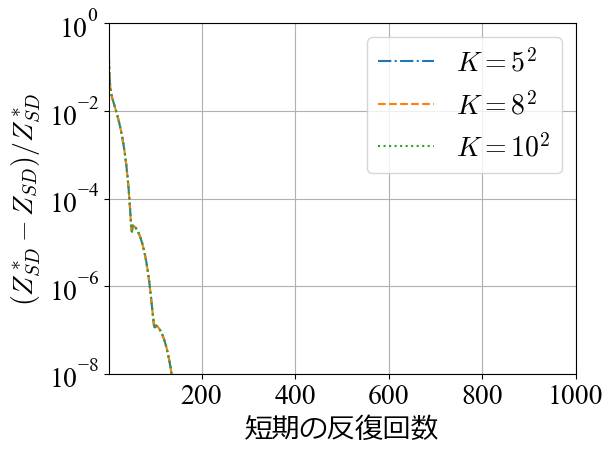

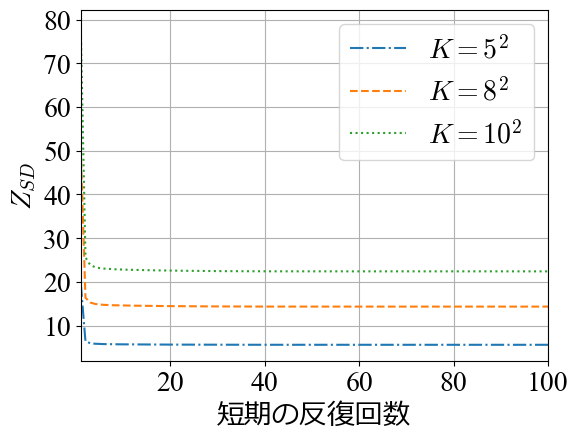

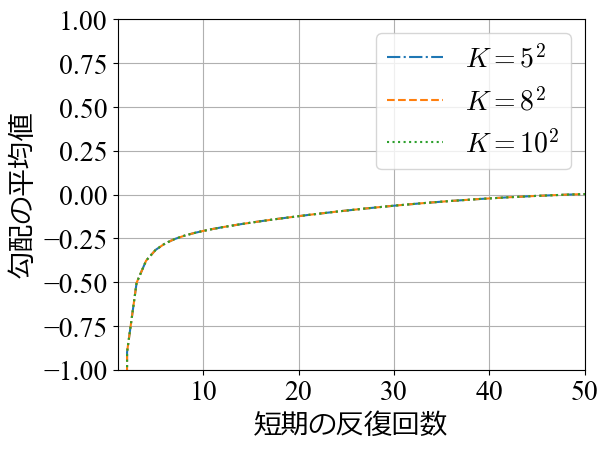

E=10, K=5^2
short_max_value: 132
Lyapunov: 2.5391259643410224e-06
short_max_value: 132
Lyapunov: 2.5391259643410224e-06
len(Z_list): 132
E=10, K=8^2
short_max_value: 132
Lyapunov: 6.5001624687130195e-06
short_max_value: 132
Lyapunov: 6.5001624687130195e-06
len(Z_list): 132
E=10, K=10^2
short_max_value: 132
Lyapunov: 1.0156503861804987e-05
short_max_value: 132
Lyapunov: 1.0156503861804987e-05
len(Z_list): 132
len(rel_path_list): 3


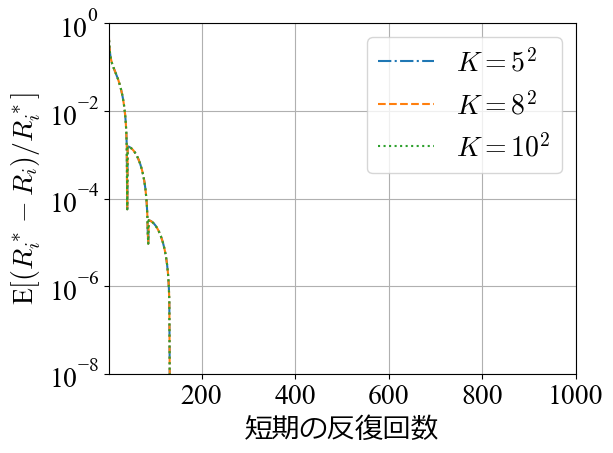

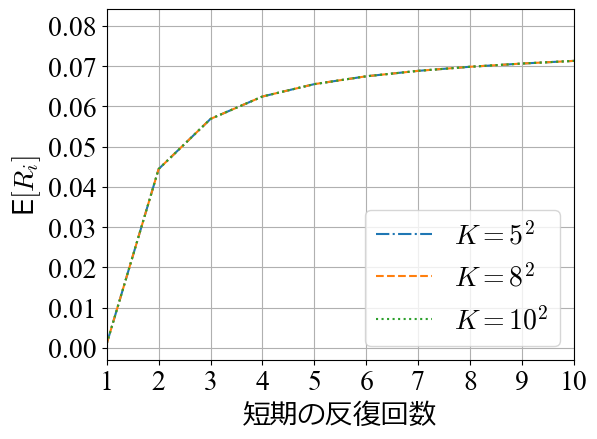

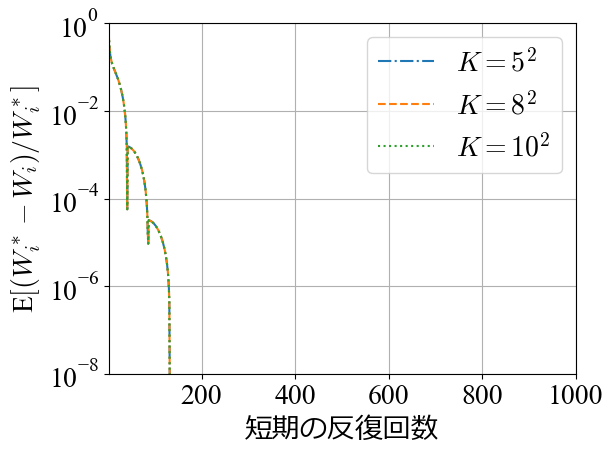

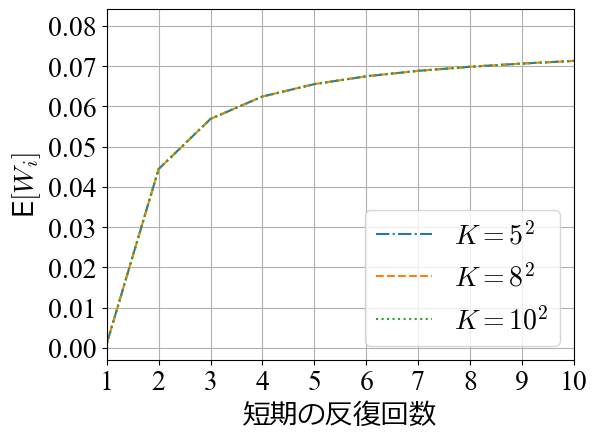

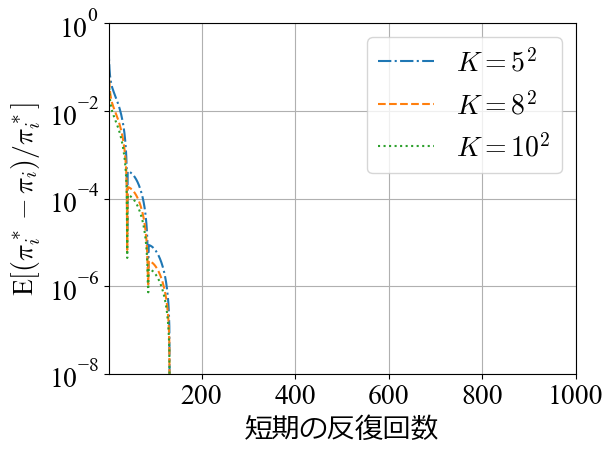

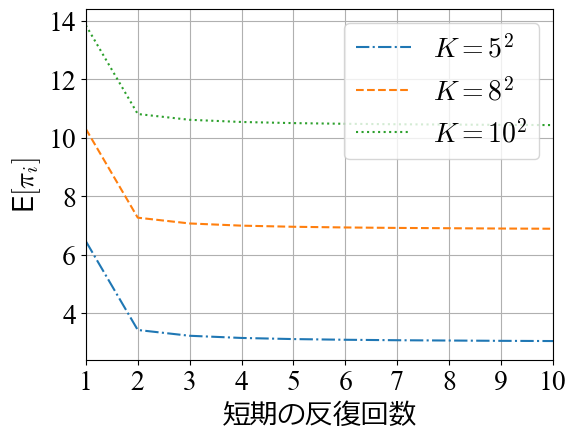

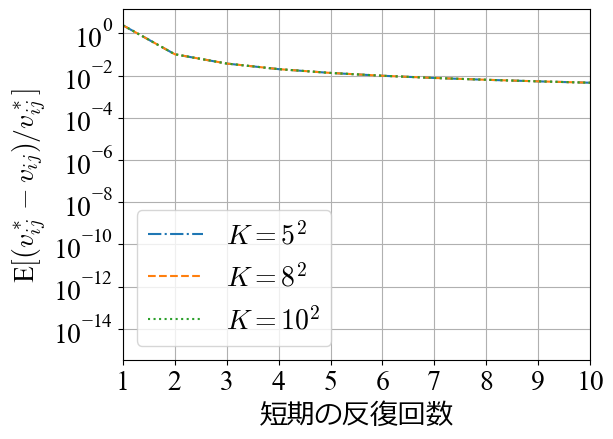

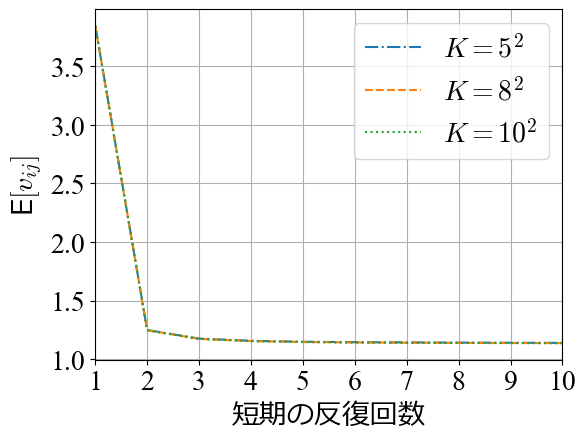

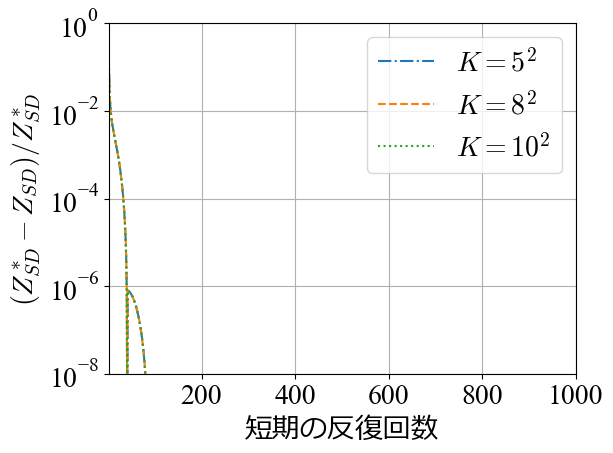

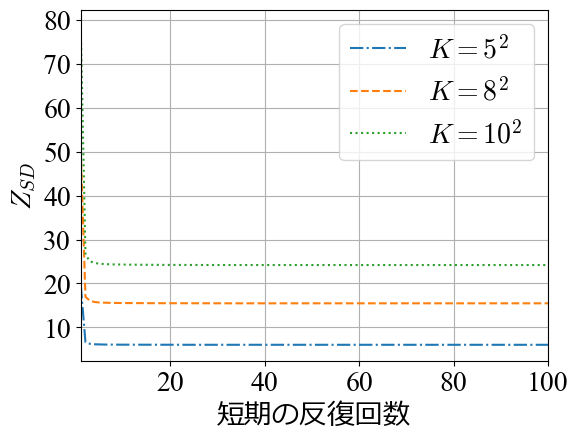

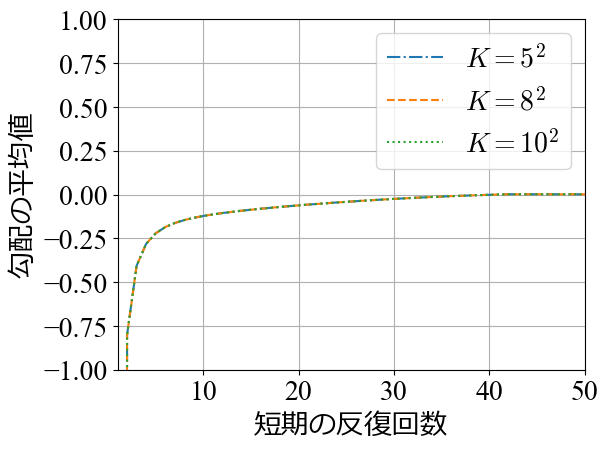

In [3]:
E_list = [5, 8, 10]
Col_list = [5, 8, 10]
R_plot_list = []
W_plot_list = []
pi_plot_list = []
v_plot_list = []
Z_plot_list = []
rel_path_list = []
for E in E_list:
        
    for Col in Col_list:
        
        print("="*40)
        print(f"E={E}, K={Col}^2")
    
        K = Col * Col

        M = 0.1 * K
        N = 0.1 * K

        # Scaling * tが格子の最小距離となる。
        Scaling = 3 / Col

        city_network = lattice.make_lattice(Col)

        # 通勤費用パラメータ
        t = 0.1

        # 距離抵抗パラメータ
        tau = 0.01

        # 総土地供給量
        S_total = K
        S_bar = S_total / K

        Coordinate_Data = \
        np.array([(city_network['node_dic'][str(i)]['x_pos']*Scaling,
                   city_network['node_dic'][str(i)]['y_pos']*Scaling) for i in range(K)])
        distance_matrix = distance.squareform(distance.pdist(Coordinate_Data))

        theta_N = 5.0
        theta_M = 5.0

        # E = 5

        alpha_1 = 0.4
        alpha_2 = 0.4
        beta_1 = 0.4
        beta_2 = 0.4
        
        L = 0.2
        eta = 1.2
        p_proj = 0.1
        
        RW_ini = 1.0
    
        #パラメータ設定
        prm = Short_FISTA.Parameter(Col, distance_matrix, t, tau, Scaling, S_total, S_bar,
                    theta_M, theta_N, E, alpha_1, alpha_2, beta_1, beta_2, M, N)
        algprm = Short_FISTA.Algo_Parameter(L, eta, p_proj)
        
        #長期の変数の設定
#         dF_long = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
#         fr'shortlong/kaisekikai/theta={prm.theta_firm}/mesh/E={prm.E}/v_proj=0.1/K={prm.Col}^2/truevalue/jikken_F.xlsx')
#         dH_long = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
#         fr'shortlong/kaisekikai/theta={prm.theta_firm}/mesh/E={prm.E}/v_proj=0.1/K={prm.Col}^2/truevalue/jikken_H.xlsx')
        
#         m_fixed = np.array(dF_long['m'].tolist())
#         n = np.array(dH_long['n'].tolist())
#         n_fixed = n.reshape(K, K)

        m_per = M / K
        m_fixed = np.array([m_per] * K)
        n_fixed = np.full((K, K), N / (K * K))
        
        short = Short_FISTA.Short(prm, algprm, m_fixed, n_fixed)
    
        #step.1-1
        R_true, W_true, iteration, err_R, err_W, err_v, err_pi, err_obj, grad_mean, \
        R_list, W_list, pi_list, v_list, Z_list =\
        short.short_solve(RW_ini, R_corr=None, W_corr=None, pi_corr=None, v_corr=None, obj_corr=None,
                          short_itr=10001, err_short=10**(-8), rel=0)

        pi_true = short.pi(R_true, W_true)
        v_true = short.v(R_true, W_true)
        
        RW_true = np.concatenate((R_true, W_true))
        obj_true = short.Z_SD(RW_true)
        
        method = "FISTA"
        dic = "Scaling=3divCol"
        long = "shuseki"

        #step.1-2
        kakunou.kakunou_true(R_true, W_true, pi_true, v_true, prm, algprm, long, method, dic)

        #step.1-3
        R, W, iteration, err_R, err_W, err_v, err_pi, err_obj, grad_mean, \
        R_list, W_list, pi_list, v_list, Z_list =\
        short.short_solve(RW_ini, R_true, W_true, pi_true, v_true, obj_true, 
                          short_itr=3001, err_short=10**(-8), rel=1)
        
        print("len(Z_list):", len(Z_list))
        
        #step.1-4
        rel_path = kakunou.kakunou_rel\
        (iteration, err_R, err_W, err_v, err_pi, err_obj, grad_mean, prm, algprm, long, method, dic)

        rel_path_list.append(rel_path)
        
        R_plot_list.append(R_list)
        W_plot_list.append(W_list)
        pi_plot_list.append(pi_list)
        v_plot_list.append(v_list)
        Z_plot_list.append(Z_list)

    #step.2
    print("len(rel_path_list):", len(rel_path_list))
    qseplot.rel_plot(R_plot_list, W_plot_list, pi_plot_list, v_plot_list, Z_plot_list, 
                     rel_path_list, Col_list, prm, algprm, long, method, dic)
    
    rel_path_list.clear()
    R_plot_list.clear()
    W_plot_list.clear()
    pi_plot_list.clear()
    v_plot_list.clear()
    Z_plot_list.clear()

In [ ]:
import numpy as np
import pandas as pd
import scipy.optimize as optimize
import scipy.sparse as spsp
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.font_manager import FontProperties
import csv
import os

E_list = [8, 10]
for E in E_list:
    print("="*40)
    print("E=f'{E}':", E)

    dF_10 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
        fr'short/FISTA/long_shuseki/dist=0.15/E={E}/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=10^2/rel_err/jikken.xlsx')
    dF_20 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
        fr'short/FISTA/long_shuseki/dist=0.15/E={E}/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=20^2/rel_err/jikken.xlsx')
    dF_30 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
        fr'short/FISTA/long_shuseki/dist=0.15/E={E}/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=30^2/rel_err/jikken.xlsx')
    
    # dF_10 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    #     fr'short/FISTA/long_ichiyou/dist=0.15/E={E}/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=10^2/rel_err/jikken.xlsx')
    # dF_20 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    #     fr'short/FISTA/long_ichiyou/dist=0.15/E={E}/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=20^2/rel_err/jikken.xlsx')
    # dF_30 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    #     fr'short/FISTA/long_ichiyou/dist=0.15/E={E}/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=30^2/rel_err/jikken.xlsx')
    
    iteration_10 = np.array(dF_10['iteration'].tolist())
    iteration_20 = np.array(dF_20['iteration'].tolist())
    iteration_30 = np.array(dF_30['iteration'].tolist())

    err_R_10 = np.array(dF_10['err_R'].tolist())
    err_R_20 = np.array(dF_20['err_R'].tolist())
    err_R_30 = np.array(dF_30['err_R'].tolist())

    err_W_10 = np.array(dF_10['err_W'].tolist())
    err_W_20 = np.array(dF_20['err_W'].tolist())
    err_W_30 = np.array(dF_30['err_W'].tolist())

    err_pi_10 = np.array(dF_10['err_pi'].tolist())
    err_pi_20 = np.array(dF_20['err_pi'].tolist())
    err_pi_30 = np.array(dF_30['err_pi'].tolist())

    err_v_10 = np.array(dF_10['err_v'].tolist())
    err_v_20 = np.array(dF_20['err_v'].tolist())
    err_v_30 = np.array(dF_30['err_v'].tolist())

    err_obj_10 = np.array(dF_10['err_obj'].tolist())
    err_obj_20 = np.array(dF_20['err_obj'].tolist())
    err_obj_30 = np.array(dF_30['err_obj'].tolist())

    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Times New Roman'
    plt.rcParams['mathtext.fontset'] = 'cm'  # 数式フォントもTimes New Romanに設定

    font_path = r'C:\Windows\Fonts\meiryo.ttc'  # フォントのパスを指定
    jp_font = FontProperties(fname=font_path)

    # Rのグラフを描画
    plt.plot(iteration_10, err_R_10, '-.', label = f'$K = {Col_list[0]}^2$')
    plt.plot(iteration_20, err_R_20, '--', label = f'$K = {Col_list[1]}^2$')
    plt.plot(iteration_30, err_R_30, ':', label = f'$K = {Col_list[2]}^2$')
    plt.yscale('log')

    plt.legend(fontsize=20)

    # plt.title('m')
    plt.xlabel('短期の反復回数', fontproperties=jp_font, fontsize=20)
    plt.ylabel('E$[(R_i^* - R_i) / R_i^*]$', fontsize=20)

    # plt.yticks([1e-1, 1e-2, 1e-3])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.xlim(left=1, right=500)
    plt.ylim(top=1, bottom=1e-8)

    plt.grid(True)

    plt.subplots_adjust(left=0.17, bottom=0.15)

    plt.show()

    # Wのグラフを描画
    plt.plot(iteration_10, err_W_10, '-.', label = f'$K = {Col_list[0]}^2$')
    plt.plot(iteration_20, err_W_20, '--', label = f'$K = {Col_list[1]}^2$')
    plt.plot(iteration_30, err_W_30, ':', label = f'$K = {Col_list[2]}^2$')
    plt.yscale('log')

    plt.legend(fontsize=20)

    # plt.title('m')
    plt.xlabel('短期の反復回数', fontproperties=jp_font, fontsize=20)
    plt.ylabel('E$[(W_i^* - W_i) / W_i^*]$', fontsize=20)

    # plt.yticks([1e-1, 1e-2, 1e-3])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.xlim(left=1, right=500)
    plt.ylim(top=1, bottom=1e-8)

    plt.grid(True)

    plt.subplots_adjust(left=0.17, bottom=0.15)

    plt.show()

    # piのグラフを描画
    plt.plot(iteration_10, err_pi_10, '-.', label = f'$K = {Col_list[0]}^2$')
    plt.plot(iteration_20, err_pi_20, '--', label = f'$K = {Col_list[1]}^2$')
    plt.plot(iteration_30, err_pi_30, ':', label = f'$K = {Col_list[2]}^2$')
    plt.yscale('log')

    plt.legend(fontsize=20)

    # plt.title('m')
    plt.xlabel('短期の反復回数', fontproperties=jp_font, fontsize=20)
    plt.ylabel('E$[(\pi_i^* - \pi_i) / \pi_i^*]$', fontsize=20)

    # plt.yticks([1e-1, 1e-2, 1e-3])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.xlim(left=1, right=500)
    plt.ylim(top=1, bottom=1e-8)

    plt.grid(True)

    plt.subplots_adjust(left=0.17, bottom=0.15)

    plt.show()

    # vのグラフを描画
    plt.plot(iteration_10, err_v_10, '-.', label = f'$K = {Col_list[0]}^2$')
    plt.plot(iteration_20, err_v_20, '--', label = f'$K = {Col_list[1]}^2$')
    plt.plot(iteration_30, err_v_30, ':', label = f'$K = {Col_list[2]}^2$')
    plt.yscale('log')

    plt.legend(fontsize=20)

    # plt.title('m')
    plt.xlabel('短期の反復回数', fontproperties=jp_font, fontsize=20)
    plt.ylabel('E$[(v_{ij}^* - v_{ij}) / v_{ij}^*]$', fontsize=20)

    # plt.yticks([1e-1, 1e-2, 1e-3])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.xlim(left=1, right=500)
    plt.ylim(top=1, bottom=1e-8)

    plt.grid(True)

    plt.subplots_adjust(left=0.17, bottom=0.15)

    plt.show()

    # グラフを描画
    plt.plot(iteration_10, err_obj_10, '-.', label = f'$K = {Col_list[0]}^2$')
    plt.plot(iteration_20, err_obj_20, '--', label = f'$K = {Col_list[1]}^2$')
    plt.plot(iteration_30, err_obj_30, ':', label = f'$K = {Col_list[2]}^2$')
    plt.yscale('log')

    plt.legend(fontsize=20)

    # plt.title('m')
    plt.xlabel('短期の反復回数', fontproperties=jp_font, fontsize=20)
    plt.ylabel('E$[(Z_{SD}^* - Z_{SD}) / Z_{SD}^*]$', fontsize=20)

    # plt.yticks([1e-1, 1e-2, 1e-3])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.xlim(left=1, right=500)
    plt.ylim(top=1, bottom=1e-8)

    plt.grid(True)

    plt.subplots_adjust(left=0.17, bottom=0.15)

    plt.show()

In [18]:
dF_10 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/dist=0.15/E=8/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=10^2/truevalue/jikken_F.xlsx')
dF_20 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/dist=0.15/E=8/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=20^2/truevalue/jikken_F.xlsx')
dF_30 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/dist=0.15/E=8/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=30^2/truevalue/jikken_F.xlsx')
dH_10 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/dist=0.15/E=8/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=10^2/truevalue/jikken_H.xlsx')
dH_20 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/dist=0.15/E=8/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=20^2/truevalue/jikken_H.xlsx')
dH_30 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/dist=0.15/E=8/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=30^2/truevalue/jikken_H.xlsx')

In [ ]:
R_10 = np.array(dF_10['R'].tolist())
R_20 = np.array(dF_20['R'].tolist())
R_30 = np.array(dF_30['R'].tolist())

print("R_10:", np.mean(R_10))
print("R_20:", np.mean(R_20))
print("R_30:", np.mean(R_30))

W_10 = np.array(dF_10['W'].tolist())
W_20 = np.array(dF_20['W'].tolist())
W_30 = np.array(dF_30['W'].tolist())

print("W_10:", np.mean(W_10))
print("W_20:", np.mean(W_20))
print("W_30:", np.mean(W_30))

pi_10 = np.array(dF_10['pi'].tolist())
pi_20 = np.array(dF_20['pi'].tolist())
pi_30 = np.array(dF_30['pi'].tolist())

v_10 = np.array(dH_10['v'].tolist()).reshape(100, 100)
v_20 = np.array(dH_20['v'].tolist()).reshape(400, 400)
v_30 = np.array(dH_30['v'].tolist()).reshape(900, 900)

# obj_10 = np.array(dF_10['obj'].tolist())
# obj_20 = np.array(dF_20['obj'].tolist())
# obj_30 = np.array(dF_30['err_obj'].tolist())

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'  # 数式フォントもTimes New Romanに設定

font_path = r'C:\Windows\Fonts\meiryo.ttc'  # フォントのパスを指定
jp_font = FontProperties(fname=font_path)

vmin = 0
vmax = None

mat = np.reshape(R_10, (10, 10))

plt.figure(figsize=(5,5))
plt.imshow(mat, interpolation='nearest', vmin = vmin, vmax = vmax, cmap='seismic')

plt.colorbar()

plt.xlabel('R_10', fontsize=20)

plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])

plt.show()


mat = np.reshape(R_20, (20, 20))

plt.figure(figsize=(5,5))
plt.imshow(mat, interpolation='nearest', vmin = vmin, vmax = vmax, cmap='seismic')

plt.colorbar()

plt.xlabel('R_20', fontsize=20)

plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])

plt.show()


mat = np.reshape(R_30, (30, 30))

plt.figure(figsize=(5,5))
plt.imshow(mat, interpolation='nearest', vmin = vmin, vmax = vmax, cmap='seismic')

plt.colorbar()

plt.xlabel('R_30', fontsize=20)

plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])

plt.show()


mat = np.reshape(W_10, (10, 10))

plt.figure(figsize=(5,5))
plt.imshow(mat, interpolation='nearest', vmin = vmin, vmax = vmax, cmap='seismic')

plt.colorbar()

plt.xlabel('W_10', fontsize=20)

plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])

plt.show()


mat = np.reshape(W_20, (20, 20))

plt.figure(figsize=(5,5))
plt.imshow(mat, interpolation='nearest', vmin = vmin, vmax = vmax, cmap='seismic')

plt.colorbar()

plt.xlabel('W_20', fontsize=20)

plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])

plt.show()


mat = np.reshape(W_30, (30, 30))

plt.figure(figsize=(5,5))
plt.imshow(mat, interpolation='nearest', vmin = vmin, vmax = vmax, cmap='seismic')

plt.colorbar()

plt.xlabel('W_30', fontsize=20)

plt.gca().invert_yaxis()
plt.xticks([])
plt.yticks([])

plt.show()

In [ ]:
rel_10 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=8/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=10^2/rel_err/jikken.xlsx')
rel_20 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=8/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=20^2/rel_err/jikken.xlsx')
rel_30 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=8/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=30^2/rel_err/jikken.xlsx')

grad_10 = np.array(rel_10['grad_mean'].tolist())
grad_20 = np.array(rel_20['grad_mean'].tolist())
grad_30 = np.array(rel_30['grad_mean'].tolist())

print("grad_10:", grad_10)
print("grad_20:", grad_20)
print("grad_30:", grad_30)

## グラフ描画

In [ ]:
dF_10 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=10/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=10^2/rel_err/jikken.xlsx')
dF_20 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=10/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=20^2/rel_err/jikken.xlsx')
dF_30 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=10/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=30^2/rel_err/jikken.xlsx')

Col_list = [10, 20, 30]

iteration_10 = np.array(dF_10['iteration'].tolist())
iteration_20 = np.array(dF_20['iteration'].tolist())
iteration_30 = np.array(dF_30['iteration'].tolist())

err_R_10 = np.array(dF_10['err_R'].tolist())
err_R_20 = np.array(dF_20['err_R'].tolist())
err_R_30 = np.array(dF_30['err_R'].tolist())

err_W_10 = np.array(dF_10['err_W'].tolist())
err_W_20 = np.array(dF_20['err_W'].tolist())
err_W_30 = np.array(dF_30['err_W'].tolist())

err_pi_10 = np.array(dF_10['err_pi'].tolist())
err_pi_20 = np.array(dF_20['err_pi'].tolist())
err_pi_30 = np.array(dF_30['err_pi'].tolist())

err_v_10 = np.array(dF_10['err_v'].tolist())
err_v_20 = np.array(dF_20['err_v'].tolist())
err_v_30 = np.array(dF_30['err_v'].tolist())

err_obj_10 = np.array(dF_10['err_obj'].tolist())
err_obj_20 = np.array(dF_20['err_obj'].tolist())
err_obj_30 = np.array(dF_30['err_obj'].tolist())

grad_10 = np.array(dF_10['grad_mean'].tolist())
grad_20 = np.array(dF_20['grad_mean'].tolist())
grad_30 = np.array(dF_30['grad_mean'].tolist())

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'  # 数式フォントもTimes New Romanに設定

font_path = r'C:\Windows\Fonts\meiryo.ttc'  # フォントのパスを指定
jp_font = FontProperties(fname=font_path)

# Rのグラフを描画
plt.plot(iteration_10, err_R_10, '-.', label = f'$K = {Col_list[0]}^2$')
plt.plot(iteration_20, err_R_20, '--', label = f'$K = {Col_list[1]}^2$')
plt.plot(iteration_30, err_R_30, ':', label = f'$K = {Col_list[2]}^2$')
plt.yscale('log')

plt.legend(fontsize=20)

# plt.title('m')
plt.xlabel('短期の反復回数', fontproperties=jp_font, fontsize=20)
plt.ylabel('E$[(R_i^* - R_i) / R_i^*]$', fontsize=20)

# plt.yticks([1e-1, 1e-2, 1e-3])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(left=1, right=500)
plt.ylim(top=1, bottom=1e-8)

plt.grid(True)

plt.subplots_adjust(left=0.17, bottom=0.15)

plt.show()

# Wのグラフを描画
plt.plot(iteration_10, err_W_10, '-.', label = f'$K = {Col_list[0]}^2$')
plt.plot(iteration_20, err_W_20, '--', label = f'$K = {Col_list[1]}^2$')
plt.plot(iteration_30, err_W_30, ':', label = f'$K = {Col_list[2]}^2$')
plt.yscale('log')

plt.legend(fontsize=20)

# plt.title('m')
plt.xlabel('短期の反復回数', fontproperties=jp_font, fontsize=20)
plt.ylabel('E$[(W_i^* - W_i) / W_i^*]$', fontsize=20)

# plt.yticks([1e-1, 1e-2, 1e-3])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(left=1, right=500)
plt.ylim(top=1, bottom=1e-8)

plt.grid(True)

plt.subplots_adjust(left=0.17, bottom=0.15)

plt.show()

# piのグラフを描画
plt.plot(iteration_10, err_pi_10, '-.', label = f'$K = {Col_list[0]}^2$')
plt.plot(iteration_20, err_pi_20, '--', label = f'$K = {Col_list[1]}^2$')
plt.plot(iteration_30, err_pi_30, ':', label = f'$K = {Col_list[2]}^2$')
plt.yscale('log')

plt.legend(fontsize=20)

# plt.title('m')
plt.xlabel('短期の反復回数', fontproperties=jp_font, fontsize=20)
plt.ylabel('E$[(\pi_i^* - \pi_i) / \pi_i^*]$', fontsize=20)

# plt.yticks([1e-1, 1e-2, 1e-3])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(left=1, right=500)
plt.ylim(top=1, bottom=1e-8)

plt.grid(True)

plt.subplots_adjust(left=0.17, bottom=0.15)

plt.show()

# vのグラフを描画
plt.plot(iteration_10, err_v_10, '-.', label = f'$K = {Col_list[0]}^2$')
plt.plot(iteration_20, err_v_20, '--', label = f'$K = {Col_list[1]}^2$')
plt.plot(iteration_30, err_v_30, ':', label = f'$K = {Col_list[2]}^2$')
plt.yscale('log')

plt.legend(fontsize=20)

# plt.title('m')
plt.xlabel('短期の反復回数', fontproperties=jp_font, fontsize=20)
plt.ylabel('E$[(v_{ij}^* - v_{ij}) / v_{ij}^*]$', fontsize=20)

# plt.yticks([1e-1, 1e-2, 1e-3])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(left=1, right=500)
plt.ylim(top=1, bottom=1e-8)

plt.grid(True)

plt.subplots_adjust(left=0.17, bottom=0.15)

plt.show()

# グラフを描画
plt.plot(iteration_10, err_obj_10, '-.', label = f'$K = {Col_list[0]}^2$')
plt.plot(iteration_20, err_obj_20, '--', label = f'$K = {Col_list[1]}^2$')
plt.plot(iteration_30, err_obj_30, ':', label = f'$K = {Col_list[2]}^2$')
plt.yscale('log')

plt.legend(fontsize=20)

# plt.title('m')
plt.xlabel('短期の反復回数', fontproperties=jp_font, fontsize=20)
plt.ylabel('E$[(Z_{SD}^* - Z_{SD}) / Z_{SD}^*]$', fontsize=20)

# plt.yticks([1e-1, 1e-2, 1e-3])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(left=1, right=100)
plt.ylim(top=1, bottom=1e-8)

plt.grid(True)

plt.subplots_adjust(left=0.17, bottom=0.15)

plt.show()

# グラフを描画
plt.plot(iteration_10, grad_10, '-.', label = f'$K = {Col_list[0]}^2$')
plt.plot(iteration_20, grad_20, '--', label = f'$K = {Col_list[1]}^2$')
plt.plot(iteration_30, grad_30, ':', label = f'$K = {Col_list[2]}^2$')

plt.legend(fontsize=20)

# plt.title('m')
plt.xlabel('短期の反復回数', fontproperties=jp_font, fontsize=20)
plt.ylabel('勾配の平均値', fontproperties=jp_font, fontsize=20)

# plt.yticks([1e-1, 1e-2, 1e-3])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(left=1, right=50)
plt.ylim(top=1, bottom=-1)

plt.grid(True)

plt.subplots_adjust(left=0.17, bottom=0.15)

plt.show()

In [4]:
dF_10 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=10/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=5^2/rel_err/jikken.xlsx')
dF_20 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=10/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=8^2/rel_err/jikken.xlsx')
dF_30 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=10/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=10^2/rel_err/jikken.xlsx')

Col_list = [10, 20, 30]

iteration_10 = np.array(dF_10['iteration'].tolist())
iteration_20 = np.array(dF_20['iteration'].tolist())
iteration_30 = np.array(dF_30['iteration'].tolist())

err_R_10 = np.array(dF_10['err_R'].tolist())
err_R_20 = np.array(dF_20['err_R'].tolist())
err_R_30 = np.array(dF_30['err_R'].tolist())

err_W_10 = np.array(dF_10['err_W'].tolist())
err_W_20 = np.array(dF_20['err_W'].tolist())
err_W_30 = np.array(dF_30['err_W'].tolist())

err_pi_10 = np.array(dF_10['err_pi'].tolist())
err_pi_20 = np.array(dF_20['err_pi'].tolist())
err_pi_30 = np.array(dF_30['err_pi'].tolist())

err_v_10 = np.array(dF_10['err_v'].tolist())
err_v_20 = np.array(dF_20['err_v'].tolist())
err_v_30 = np.array(dF_30['err_v'].tolist())

err_obj_10 = np.array(dF_10['err_obj'].tolist())
err_obj_20 = np.array(dF_20['err_obj'].tolist())
err_obj_30 = np.array(dF_30['err_obj'].tolist())

grad_10 = np.array(dF_10['grad_mean'].tolist())
grad_20 = np.array(dF_20['grad_mean'].tolist())
grad_30 = np.array(dF_30['grad_mean'].tolist())

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'  # 数式フォントもTimes New Romanに設定

font_path = r'C:\Windows\Fonts\meiryo.ttc'  # フォントのパスを指定
jp_font = FontProperties(fname=font_path)

# Rのグラフを描画
plt.plot(iteration_10, err_R_10, '-.', label = f'$K = {Col_list[0]}^2$')
plt.plot(iteration_20, err_R_20, '--', label = f'$K = {Col_list[1]}^2$')
plt.plot(iteration_30, err_R_30, ':', label = f'$K = {Col_list[2]}^2$')
plt.yscale('log')

plt.legend(fontsize=20)

# plt.title('m')
plt.xlabel('短期の反復回数', fontproperties=jp_font, fontsize=20)
plt.ylabel('E$[(R_i^* - R_i) / R_i^*]$', fontsize=20)

# plt.yticks([1e-1, 1e-2, 1e-3])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(left=1, right=500)
plt.ylim(top=1, bottom=1e-8)

plt.grid(True)

plt.subplots_adjust(left=0.17, bottom=0.15)

plt.show()

# Wのグラフを描画
plt.plot(iteration_10, err_W_10, '-.', label = f'$K = {Col_list[0]}^2$')
plt.plot(iteration_20, err_W_20, '--', label = f'$K = {Col_list[1]}^2$')
plt.plot(iteration_30, err_W_30, ':', label = f'$K = {Col_list[2]}^2$')
plt.yscale('log')

plt.legend(fontsize=20)

# plt.title('m')
plt.xlabel('短期の反復回数', fontproperties=jp_font, fontsize=20)
plt.ylabel('E$[(W_i^* - W_i) / W_i^*]$', fontsize=20)

# plt.yticks([1e-1, 1e-2, 1e-3])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(left=1, right=500)
plt.ylim(top=1, bottom=1e-8)

plt.grid(True)

plt.subplots_adjust(left=0.17, bottom=0.15)

plt.show()

# piのグラフを描画
plt.plot(iteration_10, err_pi_10, '-.', label = f'$K = {Col_list[0]}^2$')
plt.plot(iteration_20, err_pi_20, '--', label = f'$K = {Col_list[1]}^2$')
plt.plot(iteration_30, err_pi_30, ':', label = f'$K = {Col_list[2]}^2$')
plt.yscale('log')

plt.legend(fontsize=20)

# plt.title('m')
plt.xlabel('短期の反復回数', fontproperties=jp_font, fontsize=20)
plt.ylabel('E$[(\pi_i^* - \pi_i) / \pi_i^*]$', fontsize=20)

# plt.yticks([1e-1, 1e-2, 1e-3])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(left=1, right=500)
plt.ylim(top=1, bottom=1e-8)

plt.grid(True)

plt.subplots_adjust(left=0.17, bottom=0.15)

plt.show()

# vのグラフを描画
plt.plot(iteration_10, err_v_10, '-.', label = f'$K = {Col_list[0]}^2$')
plt.plot(iteration_20, err_v_20, '--', label = f'$K = {Col_list[1]}^2$')
plt.plot(iteration_30, err_v_30, ':', label = f'$K = {Col_list[2]}^2$')
plt.yscale('log')

plt.legend(fontsize=20)

# plt.title('m')
plt.xlabel('短期の反復回数', fontproperties=jp_font, fontsize=20)
plt.ylabel('E$[(v_{ij}^* - v_{ij}) / v_{ij}^*]$', fontsize=20)

# plt.yticks([1e-1, 1e-2, 1e-3])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(left=1, right=500)
plt.ylim(top=1, bottom=1e-8)

plt.grid(True)

plt.subplots_adjust(left=0.17, bottom=0.15)

plt.show()

# グラフを描画
plt.plot(iteration_10, err_obj_10, '-.', label = f'$K = {Col_list[0]}^2$')
plt.plot(iteration_20, err_obj_20, '--', label = f'$K = {Col_list[1]}^2$')
plt.plot(iteration_30, err_obj_30, ':', label = f'$K = {Col_list[2]}^2$')
plt.yscale('log')

plt.legend(fontsize=20)

# plt.title('m')
plt.xlabel('短期の反復回数', fontproperties=jp_font, fontsize=20)
plt.ylabel('E$[(Z_{SD}^* - Z_{SD}) / Z_{SD}^*]$', fontsize=20)

# plt.yticks([1e-1, 1e-2, 1e-3])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(left=1, right=100)
plt.ylim(top=1, bottom=1e-8)

plt.grid(True)

plt.subplots_adjust(left=0.17, bottom=0.15)

plt.show()

# グラフを描画
plt.plot(iteration_10, grad_10, '-.', label = f'$K = {Col_list[0]}^2$')
plt.plot(iteration_20, grad_20, '--', label = f'$K = {Col_list[1]}^2$')
plt.plot(iteration_30, grad_30, ':', label = f'$K = {Col_list[2]}^2$')

plt.legend(fontsize=20)

# plt.title('m')
plt.xlabel('短期の反復回数', fontproperties=jp_font, fontsize=20)
plt.ylabel('勾配の平均値', fontproperties=jp_font, fontsize=20)

# plt.yticks([1e-1, 1e-2, 1e-3])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlim(left=1, right=50)
plt.ylim(top=1, bottom=-1)

plt.grid(True)

plt.subplots_adjust(left=0.17, bottom=0.15)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/short/FISTA/long_shuseki/mesh/E=10/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=5^2/rel_err/jikken.xlsx'

In [5]:
dF_10 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=10/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=10^2/truevalue/jikken_F.xlsx')
dF_20 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=10/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=20^2/truevalue/jikken_F.xlsx')
dF_30 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=10/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=30^2/truevalue/jikken_F.xlsx')
dH_10 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=10/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=10^2/truevalue/jikken_H.xlsx')
dH_20 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=10/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=20^2/truevalue/jikken_H.xlsx')
dH_30 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=10/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=30^2/truevalue/jikken_H.xlsx')

In [6]:
Col_list = [10, 20, 30]
for Col in Col_list:
    K = Col * Col

    M = 0.1 * K
    N = 0.1 * K

    # Scaling * tが格子の最小距離となる。
    Scaling = 3 / Col

    city_network = lattice.make_lattice(Col)

    # 通勤費用パラメータ
    t = 0.1

    # 距離抵抗パラメータ
    tau = 0.01

    # 総土地供給量
    S_total = K
    S_bar = S_total / K

    Coordinate_Data = \
    np.array([(city_network['node_dic'][str(i)]['x_pos']*Scaling,
               city_network['node_dic'][str(i)]['y_pos']*Scaling) for i in range(K)])
    distance_matrix = distance.squareform(distance.pdist(Coordinate_Data))

    theta_N = 5.0
    theta_M = 5.0

    E = 10

    alpha_1 = 0.4
    alpha_2 = 0.4
    beta_1 = 0.4
    beta_2 = 0.4

    L = 0.2
    eta = 1.2
    p_proj = 0.1

    RW_ini = 1.0

    dF_long = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
        fr'shortlong/FISTA/theta=5.0/E=10/mesh/K={Col}^2/truevalue/jikken_F.xlsx')
    dH_long = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
        fr'shortlong/FISTA/theta=5.0/E=10/mesh/K={Col}^2/truevalue/jikken_H.xlsx')

    m_fixed = np.array(dF_long['m'].tolist())
    n_fixed = np.array(dH_long['n'].tolist()).reshape(K, K)

    prm = Short_FISTA.Parameter(Col, distance_matrix, t, tau, Scaling, S_total, S_bar,
                theta_M, theta_N, E, alpha_1, alpha_2, beta_1, beta_2, M, N)
    algprm = Short_FISTA.Algo_Parameter(L, eta, p_proj)
    short = Short_FISTA.Short(prm, algprm, m_fixed, n_fixed)

    R_10 = np.array(dF_10['R'].tolist())
    R_20 = np.array(dF_20['R'].tolist())
    R_30 = np.array(dF_30['R'].tolist())

    W_10 = np.array(dF_10['W'].tolist())
    W_20 = np.array(dF_20['W'].tolist())
    W_30 = np.array(dF_30['W'].tolist())

    RW_ini_list = RW_ini * np.ones(2 * K)
    
    print("RW_10_ave:", np.mean(R_10))
    print("RW_20_ave:", np.mean(R_20))
    print("RW_30_ave:", np.mean(R_30))

RW_10_ave: 0.0800000000344006
RW_20_ave: 0.07999999999915106
RW_30_ave: 0.08000002072932201
RW_10_ave: 0.0800000000344006
RW_20_ave: 0.07999999999915106
RW_30_ave: 0.08000002072932201
RW_10_ave: 0.0800000000344006
RW_20_ave: 0.07999999999915106
RW_30_ave: 0.08000002072932201


In [12]:
Col_list = [10, 20, 30]
for Col in Col_list:
    K = Col * Col

    M = 0.1 * K
    N = 0.1 * K

    # Scaling * tが格子の最小距離となる。
    Scaling = 3 / Col

    city_network = lattice.make_lattice(Col)

    # 通勤費用パラメータ
    t = 0.1

    # 距離抵抗パラメータ
    tau = 0.01

    # 総土地供給量
    S_total = K
    S_bar = S_total / K

    Coordinate_Data = \
    np.array([(city_network['node_dic'][str(i)]['x_pos']*Scaling,
               city_network['node_dic'][str(i)]['y_pos']*Scaling) for i in range(K)])
    distance_matrix = distance.squareform(distance.pdist(Coordinate_Data))

    theta_N = 5.0
    theta_M = 5.0

    E = 10

    alpha_1 = 0.4
    alpha_2 = 0.4
    beta_1 = 0.4
    beta_2 = 0.4

    L = 0.2
    eta = 1.2
    p_proj = 0.1

    RW_ini = 1.0

    dF_long = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
        fr'shortlong/FISTA/theta=5.0/E=10/mesh/K={Col}^2/truevalue/jikken_F.xlsx')
    dH_long = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
        fr'shortlong/FISTA/theta=5.0/E=10/mesh/K={Col}^2/truevalue/jikken_H.xlsx')

    m_fixed = np.array(dF_long['m'].tolist())
    n_fixed = np.array(dH_long['n'].tolist()).reshape(K, K)

    prm = Short_FISTA.Parameter(Col, distance_matrix, t, tau, Scaling, S_total, S_bar,
                theta_M, theta_N, E, alpha_1, alpha_2, beta_1, beta_2, M, N)
    algprm = Short_FISTA.Algo_Parameter(L, eta, p_proj)
    short = Short_FISTA.Short(prm, algprm, m_fixed, n_fixed)
    
    RW_ini_list = RW_ini * np.ones(2 * K)

    df = short.short_dual_df(RW_ini_list)
    print(f"df({Col}):", df)

df(10): [0.92715669 0.92494088 0.92325604 0.92212463 0.92155674 0.92155674
 0.92212463 0.92325604 0.92494088 0.92715669 0.92494088 0.92251979
 0.92068472 0.91945553 0.91883943 0.91883943 0.91945553 0.92068472
 0.92251979 0.92494088 0.92325604 0.92068472 0.91873224 0.91742381
 0.91676795 0.91676795 0.91742381 0.91873224 0.92068472 0.92325604
 0.92212463 0.91945553 0.91742381 0.91606041 0.91537656 0.91537656
 0.91606041 0.91742381 0.91945553 0.92212463 0.92155674 0.91883943
 0.91676795 0.91537656 0.91467833 0.91467833 0.91537656 0.91676795
 0.91883943 0.92155674 0.92155674 0.91883943 0.91676795 0.91537656
 0.91467833 0.91467833 0.91537656 0.91676795 0.91883943 0.92155674
 0.92212463 0.91945553 0.91742381 0.91606041 0.91537656 0.91537656
 0.91606041 0.91742381 0.91945553 0.92212463 0.92325604 0.92068472
 0.91873224 0.91742381 0.91676795 0.91676795 0.91742381 0.91873224
 0.92068472 0.92325604 0.92494088 0.92251979 0.92068472 0.91945553
 0.91883943 0.91883943 0.91945553 0.92068472 0.9225197

## Eを動かす(K=20^2)

In [27]:
dE_1 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=1/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=20^2/truevalue/jikken_F.xlsx')
dE_2 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=2/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=20^2/truevalue/jikken_F.xlsx')
dE_5 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=5/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=20^2/truevalue/jikken_F.xlsx')
dE_8 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=8/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=20^2/truevalue/jikken_F.xlsx')
dE_10 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=10/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=20^2/truevalue/jikken_F.xlsx')
dE_20 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=20/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=20^2/truevalue/jikken_F.xlsx')
dE_30 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=30/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=20^2/truevalue/jikken_F.xlsx')
dE_40 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=40/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=20^2/truevalue/jikken_F.xlsx')

dm = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'shortlong/kaisekikai/theta=5.0/mesh/E=10/v_proj=0.1/K=20^2/truevalue/jikken_F.xlsx')
dn = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'shortlong/kaisekikai/theta=5.0/mesh/E=10/v_proj=0.1/K=20^2/truevalue/jikken_H.xlsx')

In [ ]:
R_1 = np.array(dE_1['R'].tolist())
R_2 = np.array(dE_2['R'].tolist())
R_5 = np.array(dE_5['R'].tolist())
R_8 = np.array(dE_8['R'].tolist())
R_10 = np.array(dE_10['R'].tolist())
R_20 = np.array(dE_20['R'].tolist())
R_30 = np.array(dE_30['R'].tolist())

W_1 = np.array(dE_1['W'].tolist())
W_2 = np.array(dE_2['W'].tolist())
W_5 = np.array(dE_5['W'].tolist())
W_8 = np.array(dE_8['W'].tolist())
W_10 = np.array(dE_10['W'].tolist())
W_20 = np.array(dE_20['W'].tolist())
W_30 = np.array(dE_30['W'].tolist())
W_40 = np.array(dE_40['W'].tolist())

m_fixed = np.array(dm['m'].tolist())
n_fixed = np.array(dn['n'].tolist()).reshape(400, 400)

print("R_1:", np.mean(R_1))
print("R_2:", np.mean(R_2))
print("R_5:", np.mean(R_5))
print("R_8:", np.mean(R_8))
print("R_10:", np.mean(R_10))
print("R_20:", np.mean(R_20))
print("R_30:", np.mean(R_30))

print("S_H_1:", np.mean(0.4 / R_1))
print("S_H_2:", np.mean(0.4 / R_2))
print("S_H_5:", np.mean(0.4 / R_5))
print("S_H_8:", np.mean(0.4 / R_8))
print("S_H_10:", np.mean(0.4 / R_10))
print("S_H_20:", np.mean(0.4 / R_20))
print("S_H_30:", np.mean(0.4 / R_30))

print("W_1:", np.mean(W_1))
print("W_2:", np.mean(W_2))
print("W_5:", np.mean(W_5))
print("W_8:", np.mean(W_8))
print("W_10:", np.mean(W_10))
print("W_20:", np.mean(W_20))
print("W_30:", np.mean(W_30))

print("L_H_1:", np.mean(0.4 / W_1))
print("L_H_2:", np.mean(0.4 / W_2))
print("L_H_5:", np.mean(0.4 / W_5))
print("L_H_8:", np.mean(0.4 / W_8))
print("L_H_10:", np.mean(0.4 / W_10))
print("L_H_20:", np.mean(0.4 / W_20))
print("L_H_30:", np.mean(0.4 / W_30))

R_ini = np.ones(400)
W_ini = np.ones(400)

print("df_R:", np.mean(1.0 - (0.4 / R_ini) * np.sum(n_fixed, axis=1) - (0.4 / R_ini) * m_fixed))

print("df_W_1:", np.mean(1.0 * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * m_fixed))
print("df_W_2:", np.mean(2.0 * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * m_fixed))
print("df_W_5:", np.mean(5.0 * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * m_fixed))
print("df_W_8:", np.mean(8.0 * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * m_fixed))
print("df_W_10:", np.mean(10 * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * m_fixed))
print("df_W_20:", np.mean(20 * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * m_fixed))
print("df_W_30:", np.mean(30 * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * m_fixed))

## Eを動かす(K=30^2)

In [30]:
dE_1 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=1/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=30^2/truevalue/jikken_F.xlsx')
dE_2 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=2/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=30^2/truevalue/jikken_F.xlsx')
dE_5 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=5/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=30^2/truevalue/jikken_F.xlsx')
dE_8 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=8/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=30^2/truevalue/jikken_F.xlsx')
dE_10 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=10/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=30^2/truevalue/jikken_F.xlsx')
dE_20 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=20/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=30^2/truevalue/jikken_F.xlsx')
dE_30 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=30/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=30^2/truevalue/jikken_F.xlsx')
dE_40 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=40/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=30^2/truevalue/jikken_F.xlsx')

dm = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'shortlong/kaisekikai/theta=5.0/mesh/E=10/v_proj=0.1/K=30^2/truevalue/jikken_F.xlsx')
dn = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'shortlong/kaisekikai/theta=5.0/mesh/E=10/v_proj=0.1/K=30^2/truevalue/jikken_H.xlsx')

In [33]:
R_1 = np.array(dE_1['R'].tolist())
R_2 = np.array(dE_2['R'].tolist())
R_5 = np.array(dE_5['R'].tolist())
R_8 = np.array(dE_8['R'].tolist())
R_10 = np.array(dE_10['R'].tolist())
R_20 = np.array(dE_20['R'].tolist())
R_30 = np.array(dE_30['R'].tolist())

W_1 = np.array(dE_1['W'].tolist())
W_2 = np.array(dE_2['W'].tolist())
W_5 = np.array(dE_5['W'].tolist())
W_8 = np.array(dE_8['W'].tolist())
W_10 = np.array(dE_10['W'].tolist())
W_20 = np.array(dE_20['W'].tolist())
W_30 = np.array(dE_30['W'].tolist())
W_40 = np.array(dE_40['W'].tolist())

m_fixed = np.array(dm['m'].tolist())
n_fixed = np.array(dn['n'].tolist()).reshape(900, 900)

print("R_1:", np.mean(R_1))
print("R_2:", np.mean(R_2))
print("R_5:", np.mean(R_5))
print("R_8:", np.mean(R_8))
print("R_10:", np.mean(R_10))
print("R_20:", np.mean(R_20))
print("R_30:", np.mean(R_30))

print("S_H_1:", np.mean(0.4 / R_1))
print("S_H_2:", np.mean(0.4 / R_2))
print("S_H_5:", np.mean(0.4 / R_5))
print("S_H_8:", np.mean(0.4 / R_8))
print("S_H_10:", np.mean(0.4 / R_10))
print("S_H_20:", np.mean(0.4 / R_20))
print("S_H_30:", np.mean(0.4 / R_30))

print("W_1:", np.mean(W_1))
print("W_2:", np.mean(W_2))
print("W_5:", np.mean(W_5))
print("W_8:", np.mean(W_8))
print("W_10:", np.mean(W_10))
print("W_20:", np.mean(W_20))
print("W_30:", np.mean(W_30))

print("L_H_1:", np.mean(0.4 / W_1))
print("L_H_2:", np.mean(0.4 / W_2))
print("L_H_5:", np.mean(0.4 / W_5))
print("L_H_8:", np.mean(0.4 / W_8))
print("L_H_10:", np.mean(0.4 / W_10))
print("L_H_20:", np.mean(0.4 / W_20))
print("L_H_30:", np.mean(0.4 / W_30))

R_ini = np.ones(900)
W_ini = np.ones(900)

print("df_R:", np.mean(1.0 - (0.4 / R_ini) * np.sum(n_fixed, axis=1) - (0.4 / R_ini) * m_fixed))

print("df_W_1:", np.mean(1.0 * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * m_fixed))
print("df_W_2:", np.mean(2.0 * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * m_fixed))
print("df_W_5:", np.mean(5.0 * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * m_fixed))
print("df_W_8:", np.mean(8.0 * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * m_fixed))
print("df_W_10:", np.mean(10 * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * m_fixed))
print("df_W_20:", np.mean(20 * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * m_fixed))
print("df_W_30:", np.mean(30 * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * np.sum(n_fixed, axis=0) - (0.4 / W_ini) * m_fixed))

R_1: 0.0799999999999976
R_2: 0.07999999999980771
R_5: 0.08000000001789806
R_8: 0.0800000000000001
R_10: 0.08000000008751704
R_20: 0.08000000190580378
R_30: 0.08000000837296331
S_H_1: 5.167540316960792
S_H_2: 5.167540316967552
S_H_5: 5.16754031567801
S_H_8: 5.167539994890324
S_H_10: 5.167539990570044
S_H_20: 5.167539967005099
S_H_30: 5.167539511290496
W_1: 0.763590722215936
W_2: 0.38179282582112056
W_5: 0.1527175048611313
W_8: 0.09544770011191872
W_10: 0.07635816038785584
W_20: 0.0381793718208266
W_30: 0.025452914542282983
L_H_1: 0.535502701716595
L_H_2: 1.0710119049947142
L_H_5: 2.677525139442496
L_H_8: 4.284077993627988
L_H_10: 5.355097475936714
L_H_20: 10.710101820318243
L_H_30: 16.065152729060294
df_R: 0.9199999999999999
df_W_1: 0.02
df_W_2: 0.12000000000000004
df_W_5: 0.42000000000000015
df_W_8: 0.7200000000000003
df_W_10: 0.9200000000000003
df_W_20: 1.9200000000000006
df_W_30: 2.920000000000001


## Kを動かす(E=10)

In [13]:
dF_10 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=10/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=10^2/truevalue/jikken_F.xlsx')
dF_20 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=10/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=20^2/truevalue/jikken_F.xlsx')
dF_22 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=10/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=22^2/truevalue/jikken_F.xlsx')
dF_25 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=10/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=25^2/truevalue/jikken_F.xlsx')
dF_28 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=10/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=28^2/truevalue/jikken_F.xlsx')
dF_30 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'short/FISTA/long_shuseki/mesh/E=10/L=0.2/p_proj=0.1/v_proj=0.1/df=None/K=30^2/truevalue/jikken_F.xlsx')

In [15]:
R_10 = np.array(dF_10['R'].tolist())
R_20 = np.array(dF_20['R'].tolist())
R_22 = np.array(dF_22['R'].tolist())
R_25 = np.array(dF_25['R'].tolist())
R_28 = np.array(dF_28['R'].tolist())
R_30 = np.array(dF_30['R'].tolist())
print("R_10:", np.mean(R_10))
print("R_20:", np.mean(R_20))
print("R_22:", np.mean(R_22))
print("R_25:", np.mean(R_25))
print("R_28:", np.mean(R_28))
print("R_30:", np.mean(R_30))

print("min_R_10:", np.min(R_10))
print("min_R_20:", np.min(R_20))
print("min_R_22:", np.min(R_22))
print("min_R_25:", np.min(R_25))
print("min_R_28:", np.min(R_28))
print("min_R_30:", np.min(R_30))

W_10 = np.array(dF_10['W'].tolist())
W_20 = np.array(dF_20['W'].tolist())
W_22 = np.array(dF_22['W'].tolist())
W_25 = np.array(dF_25['W'].tolist())
W_28 = np.array(dF_28['W'].tolist())
W_30 = np.array(dF_30['W'].tolist())
print("W_10:", np.mean(W_10))
print("W_20:", np.mean(W_20))
print("W_22:", np.mean(W_22))
print("W_25:", np.mean(W_25))
print("W_28:", np.mean(W_28))
print("W_30:", np.mean(W_30))

print("min_W_10:", np.min(W_10))
print("min_W_20:", np.min(W_20))
print("min_W_22:", np.min(W_22))
print("min_W_25:", np.min(W_25))
print("min_W_28:", np.min(W_28))
print("min_W_30:", np.min(W_30))

R_10: 0.0800000000344006
R_20: 0.08000000000012647
R_22: 0.07999999969659957
R_25: 0.08000000010512144
R_28: 0.08000000000791678
R_30: 0.08000000008751704
min_R_10: 0.07284330956463937
min_R_20: 0.06463051071606393
min_R_22: 0.0629882826456074
min_R_25: 0.06069404860142814
min_R_28: 0.05865291546221028
min_R_30: 0.0574359837515898
W_10: 0.08006262825524074
W_20: 0.07941695048663801
W_22: 0.07907680957840636
W_25: 0.07834244718371697
W_28: 0.0772773288150894
W_30: 0.07635816038785584
min_W_10: 0.07894859927028745
min_W_20: 0.07126828534891162
min_W_22: 0.06774483774075755
min_W_25: 0.0617214582655842
min_W_28: 0.05518385655147545
min_W_30: 0.05092101659051092


In [24]:
dF_10 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'shortlong/kaisekikai/theta=5.0/mesh/E=10/v_proj=0.1/K=10^2/truevalue/jikken_F.xlsx')
dF_20 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'shortlong/kaisekikai/theta=5.0/mesh/E=10/v_proj=0.1/K=20^2/truevalue/jikken_F.xlsx')
dF_22 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'shortlong/kaisekikai/theta=5.0/mesh/E=10/v_proj=0.1/K=22^2/truevalue/jikken_F.xlsx')
dF_25 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'shortlong/kaisekikai/theta=5.0/mesh/E=10/v_proj=0.1/K=25^2/truevalue/jikken_F.xlsx')
dF_28 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'shortlong/kaisekikai/theta=5.0/mesh/E=10/v_proj=0.1/K=28^2/truevalue/jikken_F.xlsx')
dF_30 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'shortlong/kaisekikai/theta=5.0/mesh/E=10/v_proj=0.1/K=30^2/truevalue/jikken_F.xlsx')

dH_10 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'shortlong/kaisekikai/theta=5.0/mesh/E=10/v_proj=0.1/K=10^2/truevalue/jikken_H.xlsx')
dH_20 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'shortlong/kaisekikai/theta=5.0/mesh/E=10/v_proj=0.1/K=20^2/truevalue/jikken_H.xlsx')
dH_22 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'shortlong/kaisekikai/theta=5.0/mesh/E=10/v_proj=0.1/K=22^2/truevalue/jikken_H.xlsx')
dH_25 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'shortlong/kaisekikai/theta=5.0/mesh/E=10/v_proj=0.1/K=25^2/truevalue/jikken_H.xlsx')
dH_28 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'shortlong/kaisekikai/theta=5.0/mesh/E=10/v_proj=0.1/K=28^2/truevalue/jikken_H.xlsx')
dH_30 = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
    fr'shortlong/kaisekikai/theta=5.0/mesh/E=10/v_proj=0.1/K=30^2/truevalue/jikken_H.xlsx')

In [25]:
m_10 = np.array(dF_10['m'].tolist())
m_20 = np.array(dF_20['m'].tolist())
m_22 = np.array(dF_22['m'].tolist())
m_25 = np.array(dF_25['m'].tolist())
m_28 = np.array(dF_28['m'].tolist())
m_30 = np.array(dF_30['m'].tolist())

n_10 = np.array(dH_10['n'].tolist()).reshape(100, 100)
n_20 = np.array(dH_20['n'].tolist()).reshape(400, 400)
n_22 = np.array(dH_22['n'].tolist()).reshape(484, 484)
n_25 = np.array(dH_25['n'].tolist()).reshape(625, 625)
n_28 = np.array(dH_28['n'].tolist()).reshape(784, 784)
n_30 = np.array(dH_30['n'].tolist()).reshape(900, 900)

E = 10

vmin = 0
vmax = None

W_ini = 1.0 * np.ones(100)

print("sum_i_n_10:", np.mean(np.sum(n_10, axis=0)))
print("df_10:", np.mean(E * np.sum(n_10, axis=0) - (0.4 / W_ini) * np.sum(n_10, axis=0) - (0.4 / W_ini) * m_10))

print("="*40)

W_ini = 1.0 * np.ones(400)
print("sum_i_n_20:", np.mean(np.sum(n_20, axis=0)))
print("df_20:", np.mean(E * np.sum(n_20, axis=0) - (0.4 / W_ini) * np.sum(n_20, axis=0) - (0.4 / W_ini) * m_20))

print("="*40)

W_ini = 1.0 * np.ones(484)
print("sum_i_n_22:", np.mean(np.sum(n_22, axis=0)))
print("df_22:", np.mean(E * np.sum(n_22, axis=0) - (0.4 / W_ini) * np.sum(n_22, axis=0) - (0.4 / W_ini) * m_22))

print("="*40)

W_ini = 1.0 * np.ones(625)
print("sum_i_n_25:", np.mean(np.sum(n_25, axis=0)))
print("df_25:", np.mean(E * np.sum(n_25, axis=0) - (0.4 / W_ini) * np.sum(n_25, axis=0) - (0.4 / W_ini) * m_25))

print("="*40)

W_ini = 1.0 * np.ones(784)
print("sum_i_n_28:", np.mean(np.sum(n_28, axis=0)))
print("df_28:", np.mean(E * np.sum(n_28, axis=0) - (0.4 / W_ini) * np.sum(n_28, axis=0) - (0.4 / W_ini) * m_28))

print("="*40)

W_ini = 1.0 * np.ones(900)
print("sum_i_n_30:", np.mean(np.sum(n_30, axis=0)))
print("df_30:", np.mean(E * np.sum(n_30, axis=0) - (0.4 / W_ini) * np.sum(n_30, axis=0) - (0.4 / W_ini) * m_30))

print("="*40)

print("sum_j_n_10:", np.mean(np.sum(n_10, axis=1)))
print("sum_j_n_20:", np.mean(np.sum(n_20, axis=1)))
print("sum_j_n_22:", np.mean(np.sum(n_22, axis=1)))
print("sum_j_n_25:", np.mean(np.sum(n_25, axis=1)))
print("sum_j_n_28:", np.mean(np.sum(n_28, axis=1)))
print("sum_j_n_30:", np.mean(np.sum(n_30, axis=1)))

sum_i_n_10: 0.10000000000000002
df_10: 0.9200000000000003
sum_i_n_20: 0.10000000000000003
df_20: 0.9200000000000004
sum_i_n_22: 0.10000000000000005
df_22: 0.9200000000000004
sum_i_n_25: 0.10000000000000002
df_25: 0.9200000000000004
sum_i_n_28: 0.10000000000000005
df_28: 0.9200000000000003
sum_i_n_30: 0.10000000000000003
df_30: 0.9200000000000003
sum_j_n_10: 0.10000000000000003
sum_j_n_20: 0.10000000000000003
sum_j_n_22: 0.10000000000000005
sum_j_n_25: 0.10000000000000002
sum_j_n_28: 0.10000000000000005
sum_j_n_30: 0.10000000000000003


In [35]:
Col_list = [10, 20, 22, 25, 28, 30]
for Col in Col_list:
    
    print("="*40)
    print(f"K={Col}^2")
    
    K = Col * Col

    M = 0.1 * K
    N = 0.1 * K

    # Scaling * tが格子の最小距離となる。
    Scaling = 3 / Col

    city_network = lattice.make_lattice(Col)

    # 通勤費用パラメータ
    t = 0.1

    # 距離抵抗パラメータ
    tau = 0.01

    # 総土地供給量
    S_total = K
    S_bar = S_total / K

    Coordinate_Data = \
    np.array([(city_network['node_dic'][str(i)]['x_pos']*Scaling,
               city_network['node_dic'][str(i)]['y_pos']*Scaling) for i in range(K)])
    distance_matrix = distance.squareform(distance.pdist(Coordinate_Data))

    theta_N = 5.0
    theta_M = 5.0

    E = 8

    alpha_1 = 0.4
    alpha_2 = 0.4
    beta_1 = 0.4
    beta_2 = 0.4

    L = 0.2
    eta = 1.2
    p_proj = 0.1

    RW_ini = 1.0

    dF_long = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
        fr'shortlong/kaisekikai/theta=5.0/mesh/E=8/v_proj=0.1/K={Col}^2/truevalue/jikken_F.xlsx')
    dH_long = pd.read_excel(fr'C:/Users/kimura/OneDrive - 国立大学法人東北大学/numerical/short_dual/log/excelfile/' \
        fr'shortlong/kaisekikai/theta=5.0/mesh/E=8/v_proj=0.1/K={Col}^2/truevalue/jikken_H.xlsx')

    m_fixed = np.array(dF_long['m'].tolist())
    n_fixed = np.array(dH_long['n'].tolist()).reshape(K, K)

    prm = Short_FISTA.Parameter(Col, distance_matrix, t, tau, Scaling, S_total, S_bar,
                theta_M, theta_N, E, alpha_1, alpha_2, beta_1, beta_2, M, N)
    algprm = Short_FISTA.Algo_Parameter(L, eta, p_proj)
    short = Short_FISTA.Short(prm, algprm, m_fixed, n_fixed)
    
    RW_ini_list = RW_ini * np.ones(2 * K)

    df = short.short_dual_df(RW_ini_list)
    print(f"df({Col}):", np.mean(df))
    
    Z_SD = short.Z_SD(RW_ini_list)
    print(f"Z_SD({Col}):", Z_SD)

K=10^2
df(10): 0.82
Z_SD(10): 164.35910375168731
K=20^2
df(20): 0.82
Z_SD(20): 657.4002503085711
K=22^2
df(22): 0.8200000000000001
Z_SD(22): 795.4467183914767
K=25^2
df(25): 0.82
Z_SD(25): 1027.1601896708908
K=28^2
df(28): 0.8200000000000002
Z_SD(28): 1288.441550784343
K=30^2
df(30): 0.8200000000000002
Z_SD(30): 1479.0532306890955
